# Assignment 2 - ATP Production

$ATP = a * Proteins + b * Carbohydrates + c * Fats + ε$

Find the best possible values from a, b and c, and say which is the extent of error that this model have.


#### Firstly, I'll read the file:

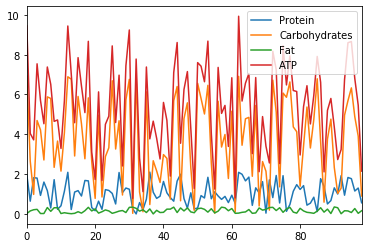

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

filename_tsv = "data/diet_and_atp.tsv"

tsv_read = pd.read_csv(filename_tsv, sep='\t')

tsv_read.plot()

In [182]:

def least_squares():
    matrix = [tsv_read.Protein.tolist()]
    matrix.append(tsv_read.Carbohydrates.tolist())
    matrix.append(tsv_read.Fat.tolist())
    matrix[0] = [1 for unos in range(len(tsv_read.Fat))]
    atp = tsv_read.ATP
    aux_tsv = tsv_read.drop('ATP',axis=1)
    transposed_matrix = aux_tsv.transpose()
    res = transposed_matrix.dot(aux_tsv)
    
    res = getBeta(res,transposed_matrix,atp)
   
    
    return res
def getBeta(res, transposed_matrix, atp):
    
    m11,m12,m13,m21,m22,m23,m31,m32,m33 = res.values.flatten()
    det = m11 * m22 * m33 +m12 * m23 * m31 + m21*m32*m13 - \
            m22*m31*m13 - m12*m21* m33- m23 *m32*m11
    
    
    df = [[m22*m33-m32*m23, m13*m32-m12*m33,m12*m23-m13*m22],[m31*m23-m21*m33, m11*m33-m31*m13,m13*m21-m11*m23],[m21*m32-m22*m31, m12*m31-m11*m32,m11*m22-m12*m21]]
   
    cofactors_matrix = pd.DataFrame(data=df, columns=['Protein','Carbohydrates','Fat'], index=['Protein','Carbohydrates','Fat']).div(det)
    
    
    #The transpose is optional, as the product of one matrix and its traverse is symmetric. 
    # adjugate_matrix = cofactors_matrix.transpose() 
    
    beta_matrix = cofactors_matrix.dot(transposed_matrix).dot(atp)
    
    return pd.DataFrame(data=beta_matrix)

def getError(coefs):
    error = 0
    coefs = coefs.values.flatten()
    for index,values in tsv_read.iterrows():
        y = coefs[0]* values.Protein + coefs[1]* values.Carbohydrates + coefs[2]* values.Fat 
        error += (values.ATP - y)**2
        ind = index
    
    return error / tsv_read.shape[0]
        



In [186]:
print(least_squares())
getError(least_squares())

                      0
Protein        1.093009
Carbohydrates  1.050463
Fat            1.906336


0.09478299447767664

We can see that the RMSE for our model is 0.0947829. The values for each variable are:

Protein: 1.093
Carbohydrates: 1.051
Fat: 1.906

With this, we get:

##### ATP = 1.093 * Proteins + 1.051 * Carbohydrates + 1.906 * Fat + Error.